In [1]:
'''
Create an "Academic performance" dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal withthem.

2.Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal withthem.

3.Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normaldistribution.
Reason and document your approach properly.
'''
import pandas as pd
import numpy as np

from google.colab import files
files.upload()

Saving StudentsPerformanceTest1.csv to StudentsPerformanceTest1.csv


{'StudentsPerformanceTest1.csv': b'gender,math score,reading score,writing score,Placement Score,placement offer count,Region\r\nfemale,72,72,74,78,1,Pune\r\nfemale,69,90,88,,2,na\r\nfemale,90,95,93,74,2,Nashik\r\nmale,47,57,,78,1,Na\r\nmale,na,78,75,81,3,Pune\r\nfemale,71,Na,78,70,4,na\r\nmale,12,44,52,12,2,Nashik\r\nmale,,65,67,49,1,Pune\r\nmale,5,77,89,55,0,\r\n'}

In [2]:
df=pd.read_csv('StudentsPerformanceTest1.csv')
df.head(10)

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [3]:
df.isnull()  #na and Na are not considered NUll

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,False,False,False,False,False,False,True


In [4]:
#Gender is a categorical value, we need to use Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['gender']=label_encoder.fit_transform(df['gender'])
df.head(10)

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,0,72,72,74.0,78.0,1,Pune
1,0,69,90,88.0,NaN,2,na
2,0,90,95,93.0,74.0,2,Nashik
3,1,47,57,NaN,78.0,1,Na
4,1,na,78,75.0,81.0,3,Pune
5,0,71,Na,78.0,70.0,4,na
6,1,12,44,52.0,12.0,2,Nashik
7,1,NaN,65,67.0,49.0,1,Pune
8,1,5,77,89.0,55.0,0,NaN


In [5]:
#Replacing na and Na with NaN
missing_values = ["Na", "na"]
df = pd.read_csv("StudentsPerformanceTest1.csv", na_values =missing_values)
df.head(10)

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
1,female,69.0,90.0,88.0,NaN,2,NaN
2,female,90.0,95.0,93.0,74.0,2,Nashik
3,male,47.0,57.0,NaN,78.0,1,NaN
4,male,NaN,78.0,75.0,81.0,3,Pune
5,female,71.0,NaN,78.0,70.0,4,NaN
6,male,12.0,44.0,52.0,12.0,2,Nashik
7,male,NaN,65.0,67.0,49.0,1,Pune
8,male,5.0,77.0,89.0,55.0,0,NaN


In [6]:
#To get rows with NaN math score
series=pd.isnull(df['math score'])
df[series]

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
4,male,NaN,78.0,75.0,81.0,3,Pune
7,male,NaN,65.0,67.0,49.0,1,Pune


In [7]:
ndf=df.copy()
ndf.fillna(0,inplace=True)
ndf.head(9)

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
1,female,69.0,90.0,88.0,0.0,2,0
2,female,90.0,95.0,93.0,74.0,2,Nashik
3,male,47.0,57.0,0.0,78.0,1,0
4,male,0.0,78.0,75.0,81.0,3,Pune
5,female,71.0,0.0,78.0,70.0,4,0
6,male,12.0,44.0,52.0,12.0,2,Nashik
7,male,0.0,65.0,67.0,49.0,1,Pune
8,male,5.0,77.0,89.0,55.0,0,0


In [11]:
#To drop rows with at least 1 null value
ndf=df.copy()
ndf=ndf.dropna()
ndf.head(10)

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
2,female,90.0,95.0,93.0,74.0,2,Nashik
6,male,12.0,44.0,52.0,12.0,2,Nashik


In [15]:
#To Drop rows if all values in that row are missing
ndf=df.copy()
ndf.dropna(how = 'all')

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
1,female,69.0,90.0,88.0,NaN,2,NaN
2,female,90.0,95.0,93.0,74.0,2,Nashik
3,male,47.0,57.0,NaN,78.0,1,NaN
4,male,NaN,78.0,75.0,81.0,3,Pune
5,female,71.0,NaN,78.0,70.0,4,NaN
6,male,12.0,44.0,52.0,12.0,2,Nashik
7,male,NaN,65.0,67.0,49.0,1,Pune
8,male,5.0,77.0,89.0,55.0,0,NaN


In [16]:
ndf=df.copy()
#To Drop columns with at least 1 null value.
ndf.dropna(axis = 1)

,gender,placement offer count
0,female,1
1,female,2
2,female,2
3,male,1
4,male,3
5,female,4
6,male,2
7,male,1
8,male,0


In [ ]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Fill missing values:
# Strategy: Fill missing numerical scores with mean value of the column

df['math score'] = df['math score'].fillna(df['math score'].mean())
df['reading score'] = df['reading score'].fillna(df['reading score'].mean())
df['writing score'] = df['writing score'].fillna(df['writing score'].mean())
df['Placement Score'] = df['Placement Score'].fillna(df['Placement Score'].mean())

print("\nDataset after handling missing values:\n", df)



Missing values:
 gender                   0
math score               2
reading score            1
writing score            1
Placement Score          1
placement offer count    0
Region                   4
dtype: int64

Dataset after handling missing values:
    gender  math score  reading score  writing score  Placement Score  \
0  female   72.000000          72.00           74.0           78.000   
1  female   69.000000          90.00           88.0           62.125   
2  female   90.000000          95.00           93.0           74.000   
3    male   47.000000          57.00           77.0           78.000   
4    male   52.285714          78.00           75.0           81.000   
5  female   71.000000          72.25           78.0           70.000   
6    male   12.000000          44.00           52.0           12.000   
7    male   52.285714          65.00           67.0           49.000   
8    male    5.000000          77.00           89.0           55.000   

   placement offer

In [ ]:
'''
● Filling a null values using replace() method
Following line will replace Nan value in dataframe with value -99
ndf.replace(to_replace = np.nan, value = -99)

To drop rows with at least 1 null value
ndf.dropna()

To Drop rows if all values in that row are missing
ndf.dropna(how = 'all')

To Drop columns with at least 1 null value.
ndf.dropna(axis = 1)

To drop rows with at least 1 null value in CSV file.
making new data frame with dropped NA values
new_data = ndf.dropna(axis = 0, how ='any')
new_data
'''

In [17]:
from google.colab import files
files.upload()

Saving demo1.csv to demo1.csv


{'demo1.csv': b'math score,reading score,writing score,placement score,placement offer count,club join year\r\n80,68,70,89,3,2019\r\n71,61,85,91,3,2019\r\n79,16,87,77,2,2018\r\n61,77,74,76,2,2020\r\n78,71,67,90,3,2019\r\n73,68,90,80,2,2019\r\n77,62,70,35,2,2020\r\n74,45,80,12,1,2019\r\n76,60,79,77,2,2020\r\n75,65,85,87,3,2018\r\n160,67,12,83,2,2020\r\n79,72,88,180,2,2019\r\n80,80,78,94,3,2021\r\n78,69,71,90,3,2019\r\n75,1,71,81,2,2019\r\n78,62,79,93,3,2021\r\n86,78,80,88,3,2019\r\n80,74,23,76,2,2021\r\n75,62,86,87,3,2019\r\n82,70,87,94,3,2019\r\n69,65,84,35,1,2018\r\n100,77,70,91,3,2018\r\n72,60,78,94,3,2019\r\n74,65,71,84,2,2019\r\n75,77,83,77,2,2020\r\n180,67,63,75,3,2021\r\n72,120,70,84,2,2021\r\n71,79,88,85,3,2021\r\n120,73,71,94,3,2019\r\n'}

In [18]:
df1=pd.read_csv('demo1.csv')
df1.head(30)

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018


<Axes: >

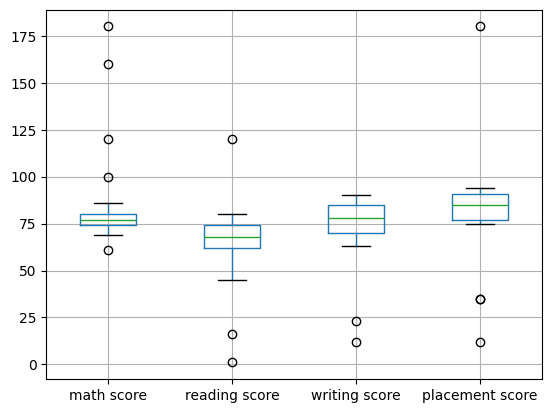

In [19]:
#Detecting outliers using Boxplot
col = ['math score', 'reading score' , 'writing score','placement score']
df1.boxplot(col)

In [ ]:
print(np.where(df1['math score']>90))
print(np.where(df1['reading score']<25))
print(np.where(df1['writing score']<30))
print(np.where(df1['placement score']<50))

(array([10, 21, 25, 28]),)
(array([ 2, 14]),)
(array([10, 17]),)
(array([ 6,  7, 20]),)


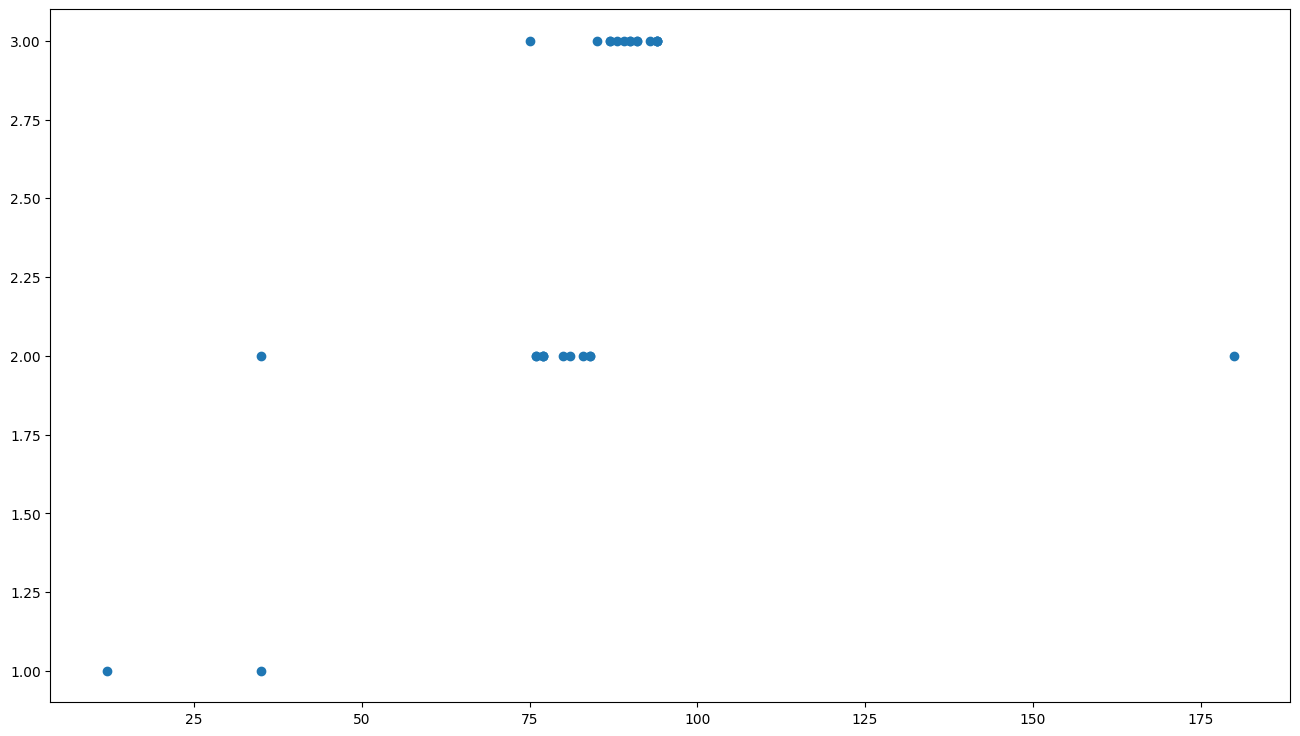

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (16,9))
ax.scatter(df1['placement score'], df1['placement offer count'])
plt.show()

In [ ]:
print(np.where((df1['placement score']<50) & (df1['placement offer count']>1)))
print(np.where((df1['placement score']>85) & (df1['placement offer count']<3)))

(array([6]),)
(array([11]),)


In [22]:
#Detecting outliers using Z-Score
import numpy as np
from scipy.stats import zscore

z = np.abs(zscore(df1['math score']))

print(z)


0     0.393532
1     1.073780
2     0.230497
3     2.051987
4     0.067463
5     0.747710
6     0.095572
7     0.584676
8     0.258607
9     0.421641
10    1.860843
11    0.230497
12    0.393532
13    0.067463
14    0.421641
15    0.067463
16    1.371739
17    0.393532
18    0.421641
19    0.719601
20    1.399849
21    1.860843
22    0.910745
23    0.584676
24    0.421641
25    1.860843
26    0.910745
27    1.073780
28    1.860843
Name: math score, dtype: float64


In [23]:
#To define an outlier threshold value is chosen.
threshold = 0.18
#Display the sample outliers
sample_outliers = np.where(z <threshold)
sample_outliers

(array([ 4,  6, 13, 15]),)

In [25]:
#Detecting outliers using Inter Quantile Range(IQR):
#Sort Reading Score feature and store it into sorted_rscore.
sorted_rscore= sorted(df1['reading score'])
sorted_rscore

[44.0,
 44.0,
 45.0,
 60.0,
 60.0,
 61.0,
 62.0,
 62.0,
 62.0,
 65.0,
 65.0,
 65.0,
 67.0,
 67.0,
 68.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 77.0,
 77.0,
 77.0,
 78.0,
 79.0,
 80.0,
 92.0]

In [28]:
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

IQR = q3-q1

lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

r_outliers = []
for i in sorted_rscore:
  if (i<lwr_bound or i>upr_bound):
    r_outliers.append(i)
print(r_outliers)

62.0 74.0
44.0 92.0
[]


In [29]:
#Handling Of Outlier
#1.Trimming/removing the outlier:
new_df=df1
for i in sample_outliers:
  new_df.drop(i,inplace=True)
new_df

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80.0,68.0,70.0,89.0,3.0,2019
1,71.0,61.0,85.0,91.0,3.0,2019
2,79.0,44.0,87.0,77.0,2.0,2018
3,65.0,77.0,74.0,76.0,2.0,2020
5,73.0,68.0,90.0,80.0,2.0,2019
7,74.0,45.0,80.0,56.0,1.0,2019
8,76.0,60.0,79.0,77.0,2.0,2020
9,75.0,65.0,85.0,87.0,3.0,2018
10,89.0,67.0,47.5,83.0,2.0,2020
11,79.0,72.0,88.0,112.0,2.0,2019


In [44]:
#Quantile based flooring and capping:
df_std = df1

# Calculate the 10th and 90th percentiles of the 'math score' column
tenth_percentile = np.percentile(df_std['math score'], 10)
ninetieth_percentile = np.percentile(df_std['math score'], 90)
print(tenth_percentile)
print(ninetieth_percentile)

# Apply flooring and capping:
# - If a value is below the 10th percentile, it gets replaced by the 10th percentile (flooring)
# - If a value is above the 90th percentile, it gets replaced by the 90th percentile (capping)
b = np.where(df_std['math score'] < tenth_percentile, tenth_percentile, np.where(df_std['math score'] > ninetieth_percentile, ninetieth_percentile, df_std['math score']))

# Insert the new 'm score' column with the floored and capped values
df_std.insert(1, "m score", b, True)
# Drop duplicate columns (assuming 'm score' columns are at positions 2, 3, etc.)

# Display the updated DataFrame
print(df_std)


71.0
103.99999999999999
    math score  m score  reading score  writing score  placement score  \
0           80     80.0             68             70               89   
1           71     71.0             61             85               91   
2           79     79.0             16             87               77   
3           61     71.0             77             74               76   
4           78     78.0             71             67               90   
5           73     73.0             68             90               80   
6           77     77.0             62             70               35   
7           74     74.0             45             80               12   
8           76     76.0             60             79               77   
9           75     75.0             65             85               87   
10         160    104.0             67             12               83   
11          79     79.0             72             88              180   
12          80

<Axes: >

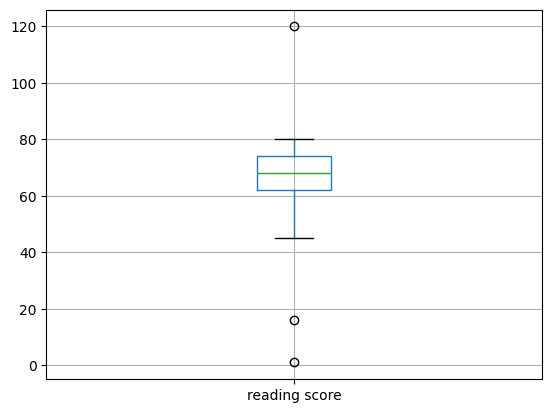

In [52]:
#Mean/Median imputation:
df1=pd.read_csv('demo1.csv')
col = ['reading score']
df1.boxplot(col)

In [43]:
median=np.median(sorted_rscore)
print(median)

68.0


<Axes: >

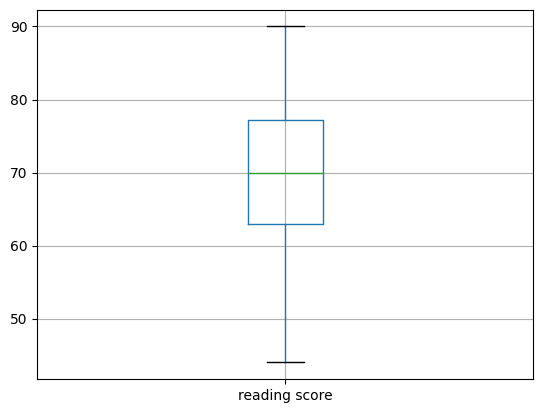

In [49]:
refined_df=df
refined_df['reading score'] = np.where(refined_df['reading score'] >upr_bound, median,refined_df['reading score'])
refined_df['reading score'] = np.where(refined_df['reading score'] <lwr_bound, median,refined_df['reading score'])
refined_df.boxplot(column='reading score')

In [55]:
#Data Transformation
from datetime import datetime

# Assume df['Club_Join_Date'] looks like '2022-01-10'
df1['club_join_year'] = pd.to_datetime(df1['club join year'])  # convert to datetime format

today = pd.to_datetime('today')

# Calculate Duration (in days)
df1['Duration_Days'] = (today - df1['club_join_year']).dt.days
df1['Duration_Months'] = df1['Duration_Days'] // 30
df1['Duration_Years'] = df1['Duration_Days'] //365
df1

,math score,reading score,writing score,placement score,placement offer count,club join year,club_join_year,Duration_Days,Duration_Years,Duration_Months
0,80,68,70,89,3,2019,1970-01-01 00:00:00.000002019,20205,55,673
1,71,61,85,91,3,2019,1970-01-01 00:00:00.000002019,20205,55,673
2,79,16,87,77,2,2018,1970-01-01 00:00:00.000002018,20205,55,673
3,61,77,74,76,2,2020,1970-01-01 00:00:00.000002020,20205,55,673
4,78,71,67,90,3,2019,1970-01-01 00:00:00.000002019,20205,55,673
5,73,68,90,80,2,2019,1970-01-01 00:00:00.000002019,20205,55,673
6,77,62,70,35,2,2020,1970-01-01 00:00:00.000002020,20205,55,673
7,74,45,80,12,1,2019,1970-01-01 00:00:00.000002019,20205,55,673
8,76,60,79,77,2,2020,1970-01-01 00:00:00.000002020,20205,55,673
9,75,65,85,87,3,2018,1970-01-01 00:00:00.000002018,20205,55,673
